Particle Swarm Optimization is a population based stochastic optimization technique developed by Dr. Eberhart and Dr. Kennedy in 1995 inspired by the social behavior of birds or schools of fish.

**Story:** a group of birds is looking for food in a vast valley. There is food in only one place in this valley. None of the birds know where the food is, but all the birds have an idea of how far away they are from the food.

**PSO**: a group of particles (potential solutions) of the global minimum in a search space. There is only a global minimum in this search space. None of the particles knows where the global minimum is located, but all particles have fitness values evaluated by the fitness function to be optimized.

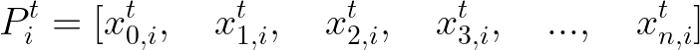

These particles are a potential solution of the function to be minimized. They are defined by their coordinates in the search space.

Particles can be randomly defined in the search space. But these particles must be in movement to find the optimal function.

**Story:** each of these birds moves with a certain speed of flight through the valley to find food.

**PSO:** each of these particles is in movement with a velocity allowing them to update their position over the iterations to find the global minimum.

The particles have already been randomly distributed in the search space. Their velocity must then be initialized. Defined by its speed in each direction the velocity vector will once again be randomized. For this reason, we speak of stochastic algorithms.

The particles have already been randomly distributed in the search space. Their velocity must then be initialized. Defined by its speed in each direction the velocity vector will once again be randomized. For this reason, we speak of stochastic algorithms.

##**Swarm**

PSO shares many similarities with evolutionary computation techniques such as Genetic Algorithms (GA). The system is initialized with a population of random solutions and searches for optima by updating generations. However, unlike GA, PSO has no evolution operators such as crossover and mutation. The difference is in the way the generations are updated.

**Story:** while flying through the valley, the birds keep their speed (inertia) but also change their direction. Each bird aims to prove he is better than the others. He tries to find food based on his intuition (cognitive). But because he tends to imitate the others (social), he is also influenced by the experience and knowledge of his group.

**PSO:** over the iterations in the search space, the speed of each particle is stochastically accelerated towards its previous best position (personal best) and towards the best solution of the group (global best).

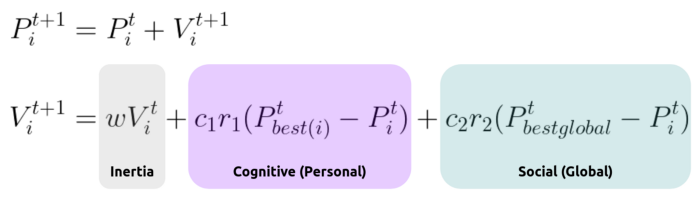

Concretely, at each iteration, each particle is updated according to its velocity. This velocity is subject to inertia and is governed by the two best values found so far.

The first value is the best personal solution the particle has found so far. The second one is the best global solution that the swarm of particles has found so far. So each particle has in memory its best personal solution and the best global solution.

The inertia, cognitive and social coefficients. These coefficients control the levels of exploration and exploitation. Exploitation is the ability of particles to target the best solutions found so far. 

Exploration, on the other hand, is the ability of particles to evaluate the entire research space. The challenge of the remaining part of the article will be to determine the impact of these coefficients to find a good balance between exploration and exploitation.

**Story:** each day, our emotionally driven birds can more or less get up on the wrong side of the bed. Then they will more or less want to follow their intuition and follow the group.

**PSO:** at each iteration, the acceleration is weighted by random terms. Cognitive acceleration and social acceleration are stochastically adjusted by the weights r1 and r2.

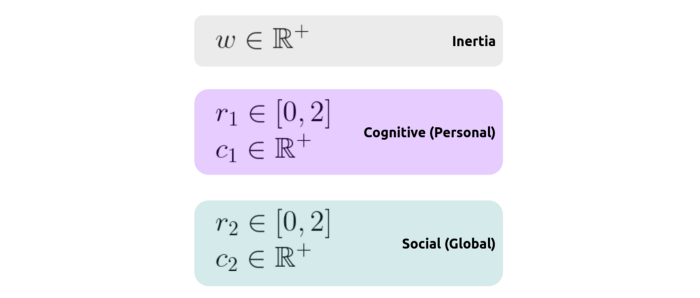

**Story:** in wildlife, there are different bird species. These different species more or less like to change their direction over time.

**PSO:** the hyperparameter w allows to define the ability of the swarm to change its direction. The particles have an inertia proportional to this coefficient w.

The inertia weight w thus makes a balance between the exploration and the exploitation of the best solutions found so far. Let’s look at how these solutions are found by studying the coefficients c1 and c2 (also called acceleration coefficients).

**Story:** in wildlife, there are different bird species. Each species has an overall tendency to follow its instinct (personal) and a tendency to focus on the group experience (social).

**PSO:** the c1 hyperparameter allows defining the ability of the group to be influenced by the best personal solutions found over the iterations. The hyperparameter c2 allows defining the ability of the group to be influenced by the best global solution found over the iterations.

##Auto hyperparameters
**Story:** defined as we just did, our bird species are a little weak-minded. What we would like is to have a group of birds that takes advantage of their numbers to explore the valley as well as possible. This same group of birds, after concertation, would exploit the best places by refocusing their search with their progress.

**PSO:** we can go even further by updating coefficients over the iterations. Starting with a strong c1, strong w, and weak c2 to increase the exploration of the search space, we want to tend towards a weak c1, weak w, and strong c2 to exploit the best results after exploration by converging towards the global minimum.

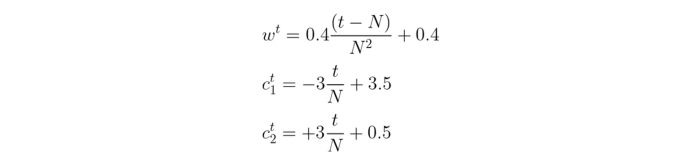

In [ ]:
import sys
import numpy as np

class PSO:

    def __init__(self, particles, velocities, fitness_function,
                 w=0.8, c_1=1, c_2=1, max_iter=100, auto_coef=True):
        self.particles = particles
        self.velocities = velocities
        self.fitness_function = fitness_function

        self.N = len(self.particles)
        self.w = w
        self.c_1 = c_1
        self.c_2 = c_2
        self.auto_coef = auto_coef
        self.iter = 0
        self.max_iter = max_iter


        self.p_bests = self.particles
        self.p_bests_values = self.fitness_function(self.particles)
        self.g_best = self.p_bests[0]
        self.g_best_value = self.p_bests_values[0]
        self.update_bests()

        self.is_running = True
        self.update_coef()
        self.__str__()

    def __str__(self):
        return f'[{self.iter}/{self.max_iter}] $w$:{self.w:.3f} - $c_1$:{self.c_1:.3f} - $c_2$:{self.c_2:.3f}'

    def next(self):
        if self.iter > 0:
            self.move_particles()
            self.update_bests()
            self.update_coef()

        self.iter += 1
        self.is_running = self.is_running and self.iter < self.max_iter
        return self.is_running

    def update_coef(self):
        if self.auto_coef:
            t = self.iter
            n = self.max_iter
            self.w = (0.4/n**2) * (t - n) ** 2 + 0.4
            self.c_1 = -3 * t / n + 3.5
            self.c_2 =  3 * t / n + 0.5

    def move_particles(self):

        # add inertia
        new_velocities = self.w * self.velocities
        # add cognitive component
        r_1 = np.random.random(self.N)
        r_1 = np.tile(r_1[:, None], (1, 2))
        new_velocities += self.c_1 * r_1 * (self.p_bests - self.particles)
        # add social component
        r_2 = np.random.random(self.N)
        r_2 = np.tile(r_2[:, None], (1, 2))
        g_best = np.tile(self.g_best[None], (self.N, 1))
        new_velocities += self.c_2 * r_2 * (g_best  - self.particles)

        self.is_running = np.sum(self.velocities - new_velocities) != 0

        # update positions and velocities
        self.velocities = new_velocities
        self.particles = self.particles + new_velocities


    def update_bests(self):
        fits = self.fitness_function(self.particles)

        for i in range(len(self.particles)):
            # update best personnal value (cognitive)
            if fits[i] < self.p_bests_values[i]:
                self.p_bests_values[i] = fits[i]
                self.p_bests[i] = self.particles[i]
                # update best global value (social)
                if fits[i] < self.g_best_value:
                    self.g_best_value = fits[i]
                    self.g_best = self.particles[i]

    def optimize(self):
      while (self.next()):
        print(self)

In [ ]:
import numpy as np
n_particles = 20
np.random.seed(100)
particles = np.random.rand(n_particles, 2) * 5
print(len(particles))
velocities = np.random.randn(n_particles, 2) * 0.1

20


In [ ]:
print(len(velocities))

20


In [ ]:
def fitness_function(particles):
  fits=[]
  for p in particles:
    "Objective function"
    fits.append((p[0]-3.14)**2 + (p[1]-2.72)**2 + np.sin(3*p[0]+1.41) + np.sin(4*p[1]-1.73))
  return fits

In [ ]:
pso=PSO(particles, velocities, fitness_function, w=0.8, c_1=1, c_2=1, max_iter=100, auto_coef=True)

In [ ]:
pso.optimize()

[1/100] $w$:0.800 - $c_1$:3.500 - $c_2$:0.500
[2/100] $w$:0.792 - $c_1$:3.470 - $c_2$:0.530
[3/100] $w$:0.784 - $c_1$:3.440 - $c_2$:0.560
[4/100] $w$:0.776 - $c_1$:3.410 - $c_2$:0.590
[5/100] $w$:0.769 - $c_1$:3.380 - $c_2$:0.620
[6/100] $w$:0.761 - $c_1$:3.350 - $c_2$:0.650
[7/100] $w$:0.753 - $c_1$:3.320 - $c_2$:0.680
[8/100] $w$:0.746 - $c_1$:3.290 - $c_2$:0.710
[9/100] $w$:0.739 - $c_1$:3.260 - $c_2$:0.740
[10/100] $w$:0.731 - $c_1$:3.230 - $c_2$:0.770
[11/100] $w$:0.724 - $c_1$:3.200 - $c_2$:0.800
[12/100] $w$:0.717 - $c_1$:3.170 - $c_2$:0.830
[13/100] $w$:0.710 - $c_1$:3.140 - $c_2$:0.860
[14/100] $w$:0.703 - $c_1$:3.110 - $c_2$:0.890
[15/100] $w$:0.696 - $c_1$:3.080 - $c_2$:0.920
[16/100] $w$:0.689 - $c_1$:3.050 - $c_2$:0.950
[17/100] $w$:0.682 - $c_1$:3.020 - $c_2$:0.980
[18/100] $w$:0.676 - $c_1$:2.990 - $c_2$:1.010
[19/100] $w$:0.669 - $c_1$:2.960 - $c_2$:1.040
[20/100] $w$:0.662 - $c_1$:2.930 - $c_2$:1.070
[21/100] $w$:0.656 - $c_1$:2.900 - $c_2$:1.100
[22/100] $w$:0.650 - $